# Upload file on s3 bucket


## Upload multiple files on s3 bucket using cache
Here, we will upload multiple files on s3 bucket using cache and record their readings in a dictionary. We have implemented **LRU_Cache**, **TTL_CACHE**, **LFU_CACHE**, **RR_CACHE** using decorator where maxsize for each cache is 100.

In [32]:
cache_dict = dict()
cache_dict['lru_cache'] = dict()
cache_dict['ttl_cache'] = dict()
cache_dict['lfu_cache'] = dict()
cache_dict['rr_cache'] = dict()

In [83]:
import boto3
from botocore.exceptions import NoCredentialsError
from cachetools import cached, TTLCache, LFUCache, LRUCache, RRCache
import os
import timeit

ACCESS_KEY = os.environ['ACCESS_KEY']
SECRET_KEY = os.environ['SECRET_KEY']

@cached(LRUCache(maxsize=100))
def upload_to_aws(local_file, bucket, s3_file):

    try:
        s3.upload_file(local_file, bucket, s3_file)
        print("Upload Successful")
        return True
    except FileNotFoundError:
        print("The file was not found")
        return False
    except NoCredentialsError:
        print("Credentials not available")
        return False

location = os.getcwd()
file_list = os.listdir(location)

s3 = boto3.client('s3', aws_access_key_id=ACCESS_KEY,
                      aws_secret_access_key=SECRET_KEY)
j=8
rows = []
for i in range(10):
    j+=1
    n_rows = 2**j
    rows.append(n_rows)
    filename = os.path.join(location, file_list[i])
    timing = %timeit -q -n1 -o response = upload_to_aws(filename, "sentientx", "EOD/"+file_list[i])
    cache_dict['lru_cache'][n_rows] = timing.best

Upload Successful
Upload Successful
Upload Successful
Upload Successful
Upload Successful
Upload Successful
Upload Successful
Upload Successful
Upload Successful
Upload Successful


In [53]:
import pandas as pd
''' Converting cache dictionary into dataframe to compare timing. '''
res = pd.DataFrame(cache_dict)
res

,lru_cache,ttl_cache,lfu_cache,rr_cache
512,0.000003,0.000004,0.000011,0.000003
1024,0.000006,0.000009,0.000003,0.000002
2048,0.000003,0.000009,0.000009,0.000003
4096,0.000008,0.000010,0.000003,0.000006
8192,0.000006,0.000010,0.000007,0.000002
16384,0.000003,0.000010,0.000006,0.000003
32768,0.000005,0.000009,0.000008,0.000003
65536,0.000003,0.000011,0.000006,0.000004
131072,0.000006,0.000004,0.000003,0.000006
262144,0.000007,0.000011,0.000007,0.000004


### Standard Deviation of different Cache
Here, we will calculate standard deviation of timings of different cache.

In [74]:
cache_std = dict()
cache_std['lru_cache'] = res['lru_cache'].std()
cache_std['ttl_cache'] = res['ttl_cache'].std()
cache_std['lfu_cache'] = res['lfu_cache'].std()
cache_std['rr_cache'] = res['rr_cache'].std()

cache_std_df = pd.DataFrame(cache_std, index=['std'])
cache_std_df

## Plot cache
Here, we will plot different cache timing taken by them to upload 10 files.

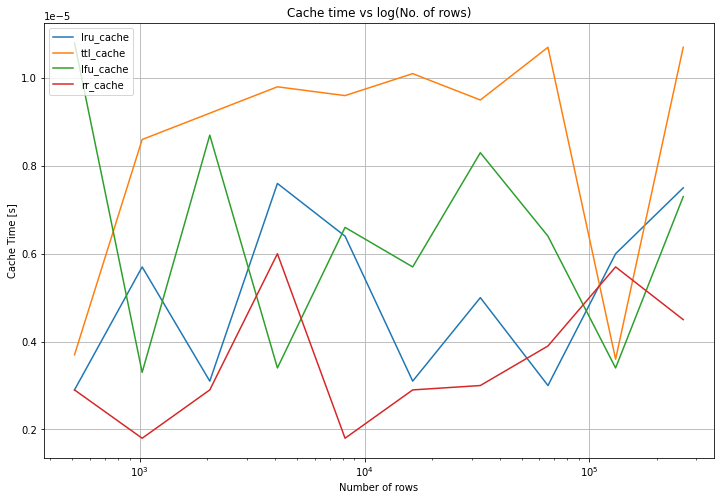

In [77]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))

# Storing times
res.plot(ax=ax)
ax.set_xticks(rows)
ax.set_xscale('log')
ax.set_xlabel('Number of rows')
ax.set_ylabel('Cache Time [s]')
ax.set_title('Cache time vs log(No. of rows)')
ax.grid()
ax.legend(loc=2)

In [88]:
sum(res['rr_cache'])

3.539999761414947e-05

# Conclusion
LRU vs TTL vs LFU vs RR cache

|LRU Cache|TTL Cache|LFU Cache|RR Cache|
|---|---|---|---|
|Total time for uploading 10 files = 5.029 s|Total time for uploading 10 files = 8.549 s|Total time for uploading 10 files = 6.39 s|Total time for uploading 10 files = 3.539 s|